In [1]:
# The function of this notebook is to use scores on formative assignments to determine (a) what assignment scores are 
# predictors of scores on the unit assessment and (b) estimate the unit assessment score for students who have not 
# yet taken it. Goal (b) is in progress.

# Import relevant libraries and packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
#Import important modules and read .csv into a dataframe

import pandas as pd

df = pd.read_csv('testprediction_anon.csv')

df.head()

,Student_name,Student_ID,Rtest,RQuiz1,RQuiz2,IntPrac,WritPrac
0,Student_1,1_9,57,78,72,33,94
1,Student_2,3_22,57,52,51,0,42
2,Student_3,3_24,59,83,60,94,72
3,Student_4,1_10,62,74,60,95,68
4,Student_5,3_12,62,91,81,84,98


In [3]:
# Give size of dataset

df.shape

(61, 7)

In [4]:
# Drop identifier column

df2 = df.drop(['Student_name'], axis=1)
df2

,Student_ID,Rtest,RQuiz1,RQuiz2,IntPrac,WritPrac
0,1_9,57,78,72,33,94
1,3_22,57,52,51,0,42
2,3_24,59,83,60,94,72
3,1_10,62,74,60,95,68
4,3_12,62,91,81,84,98
...,...,...,...,...,...,...
56,3_8,99,100,97,100,98
57,1_27,100,91,91,98,100
58,1_28,100,100,98,100,100
59,3_1,100,100,100,98,100


In [5]:
# Determine number of not-a-number cells. All should have removed in preliminary dataset cleaning.

print("number of NaN values for the column Rtest :", df['Rtest'].isnull().sum())
print("number of NaN values for the column IntPrac :", df['IntPrac'].isnull().sum())

number of NaN values for the column Rtest : 0
number of NaN values for the column IntPrac : 0


In [6]:
# Show types of data

df2.dtypes

Student_ID    object
Rtest          int64
RQuiz1         int64
RQuiz2         int64
IntPrac        int64
WritPrac       int64
dtype: object

In [7]:
# Convert "Rtest" from float to int and replace NaN values

df['Rtest'] = df['Rtest'].fillna(0).astype(int)
print(df2)
print(df.dtypes)

   Student_ID  Rtest  RQuiz1  RQuiz2  IntPrac  WritPrac
0         1_9     57      78      72       33        94
1        3_22     57      52      51        0        42
2        3_24     59      83      60       94        72
3        1_10     62      74      60       95        68
4        3_12     62      91      81       84        98
..        ...    ...     ...     ...      ...       ...
56        3_8     99     100      97      100        98
57       1_27    100      91      91       98       100
58       1_28    100     100      98      100       100
59        3_1    100     100     100       98       100
60       3_19    100     100      89       96        97

[61 rows x 6 columns]
Student_name    object
Student_ID      object
Rtest            int32
RQuiz1           int64
RQuiz2           int64
IntPrac          int64
WritPrac         int64
dtype: object


<AxesSubplot:xlabel='RQuiz2', ylabel='Rtest'>

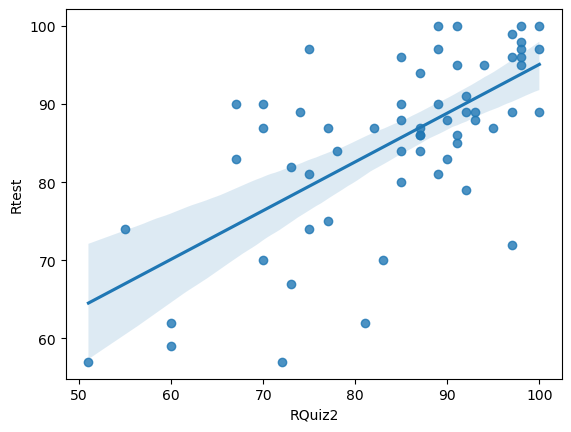

In [8]:
# Determine if second quiz grade is correlated with test score

sns.regplot(x="RQuiz2", y="Rtest", data=df)

In [9]:
# Show what feature is most correlated with test score.

df.corr()['Rtest'].sort_values()

WritPrac    0.218314
IntPrac     0.270507
RQuiz1      0.409520
RQuiz2      0.662902
Rtest       1.000000
Name: Rtest, dtype: float64

In [10]:
# Fit a linear regression model to predict the 'test score' using the feature 'Written Practice' then calculate the R^2

X = df[['RQuiz2']]
Y = df['Rtest']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.43943856066817444

In [11]:
# Fit a linear regression model to predict the 'test score' using all of the formative grades.

formatives = ["RQuiz1", "RQuiz2", "IntPrac", "WritPrac"]     

In [12]:
# Calculate the R^2.

X = df[formatives]
Y = df['Rtest']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

0.46580666967145923